# Introduction to the Tidyvrse in R

Note that this notebook relies heavily on material from the textbook [R for Data Science](https://r4ds.had.co.nz/index.html) by Hadley Wickham and Garrett Grolemund, and to a lesser extent, on the [DataCamp course on the Tidyverse](https://www.datacamp.com/courses/introduction-to-the-tidyverse). Both are great resources to explore!

## A. What is the Tidyverse?

The Tidyverse is a collection of R packages meant to streamline data science tasks. All Tidyverse packages share an underlying design philosophy, grammar, and data structures. In this notebook, we'll learn some basics of the Tidyverse. To install the tidyverse, open R Studio from the Anaconda Navigator, and type install.packages("tidyverse", dependencies = TRUE). Then, for each new session, you will need to load the Tidyverse:

In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


## B. Some (Very) Basic Plotting with ggplot

Let's do some plotting with the mpg dataset. mpg contains observations collected by the US Environmental Protection Agency on 38 models of car.

First, load and learn about the variables contained in this dataset. The dataset is in the ggplot2 package, which is included in the tidyverse. So, you can load the data using data(mpg).

In [3]:
data(mpg)
#help(mpg)
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Let's look at a plot that might tell us about the relationship between drv (whether the car is front, rear, or 4-wheel drive) and hwy (highway miles per gallon).

We begin a plot with the function ggplot(), which creates a coordinate system that you can add layers to. Layers are created with "+" geom_boxplot() will make a boxplot. In general, a template for creating plots would be 

$\text{ggplot(data = DATA) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))}$

**Here's the basic code for the boxplot (fill in the correct variables):**

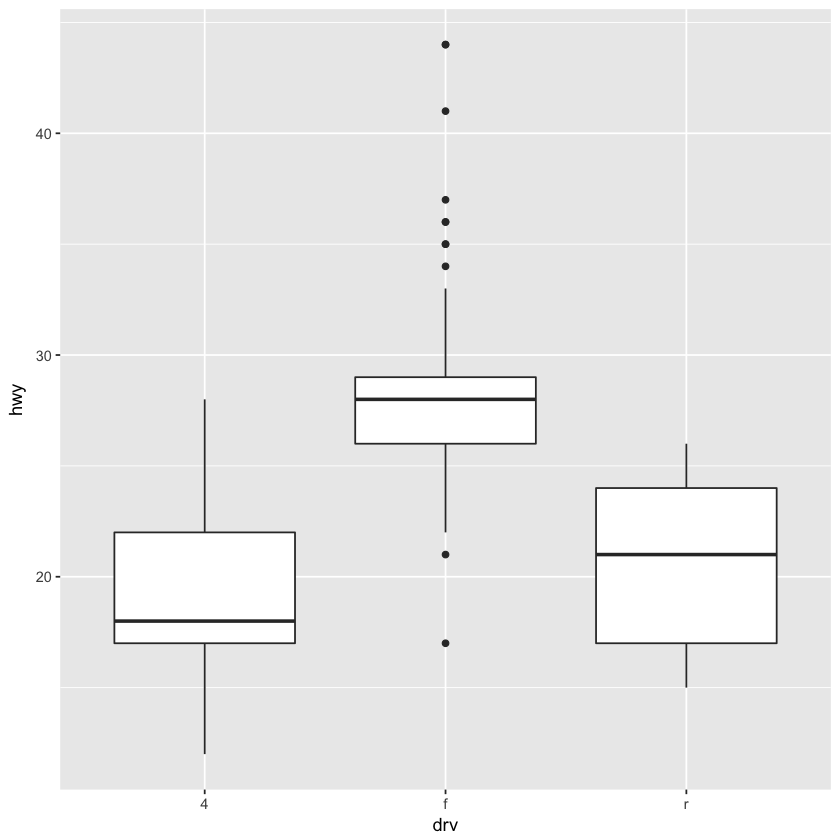

In [4]:
ggplot(data = mpg) + 
  geom_boxplot(mapping = aes(x = drv, y = hwy)) 


**What do we notice about the relationship?**

You can mess with *all* sorts of things. For example, you could change colors:

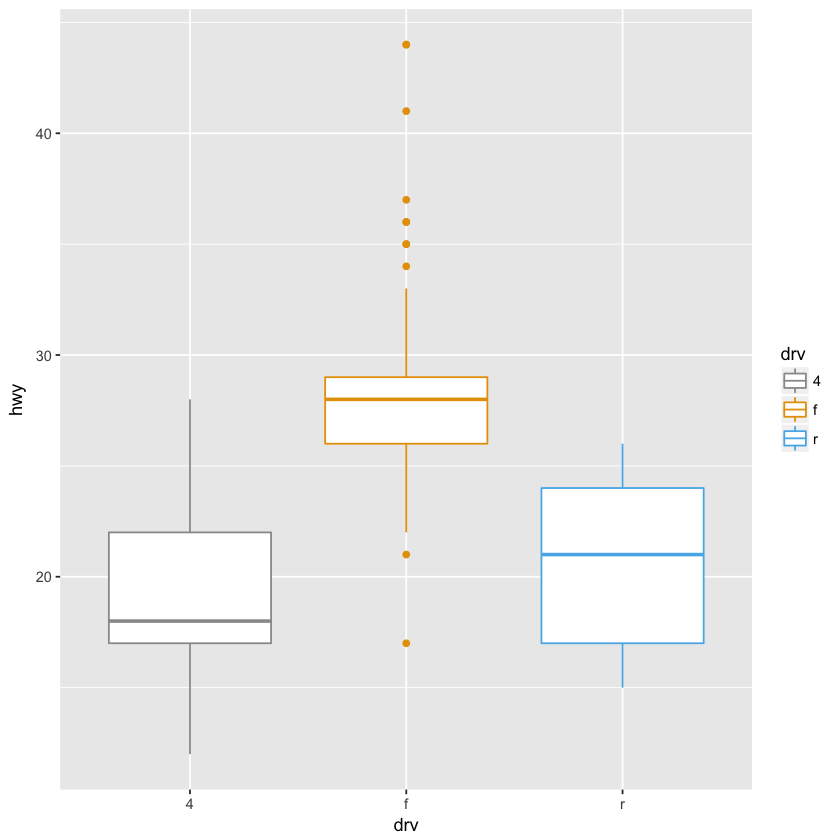

In [5]:
ggplot(data = mpg) + 
  geom_boxplot(mapping = aes(x = drv, y = hwy, color = drv)) + 
scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))

Now let's try a scatterplot. **Use the template above to plot hwy (y) against displ (x).** geom_point() will give a scatterplot.

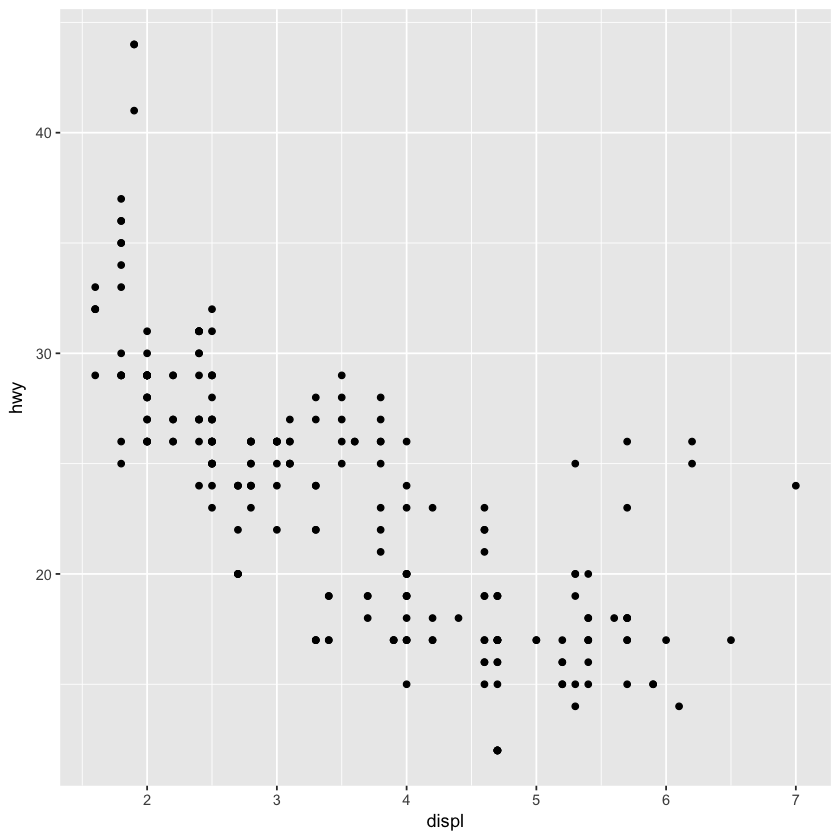

In [6]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

**What do we notice about the relationship between engine displacement and hwy miles per gallon?**

**Now, let's color points based on whether they represent a vehicle that is front, rear, or 4-wheel drive.**

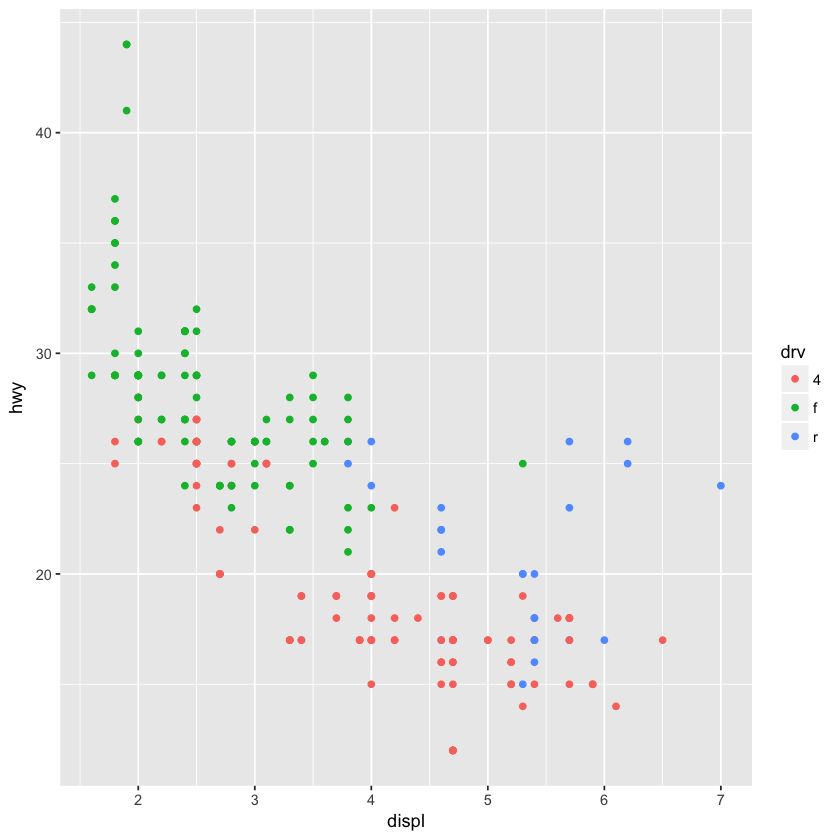

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = drv))

**What do we notice?**

**Describe what the following code does and why it might be useful**.

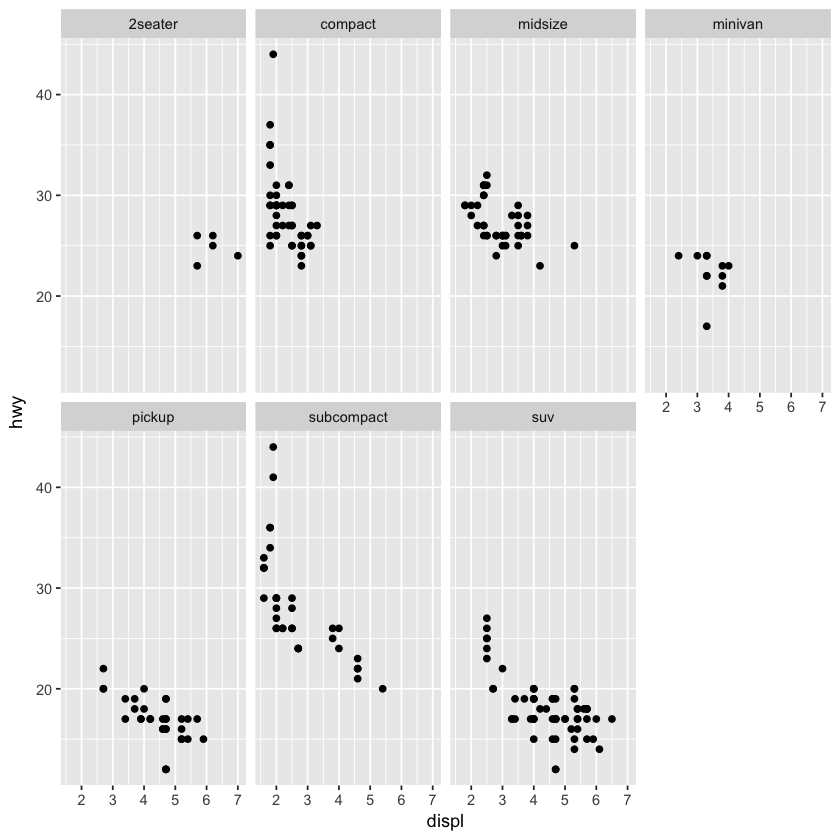

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

Instead of seeing the individual data points, we might be interested in visualizing some overall trend between displ and hwy. We could do this by substituting geom_points() with geom_smooth(). **Try it!**

`geom_smooth()` using method = 'loess'


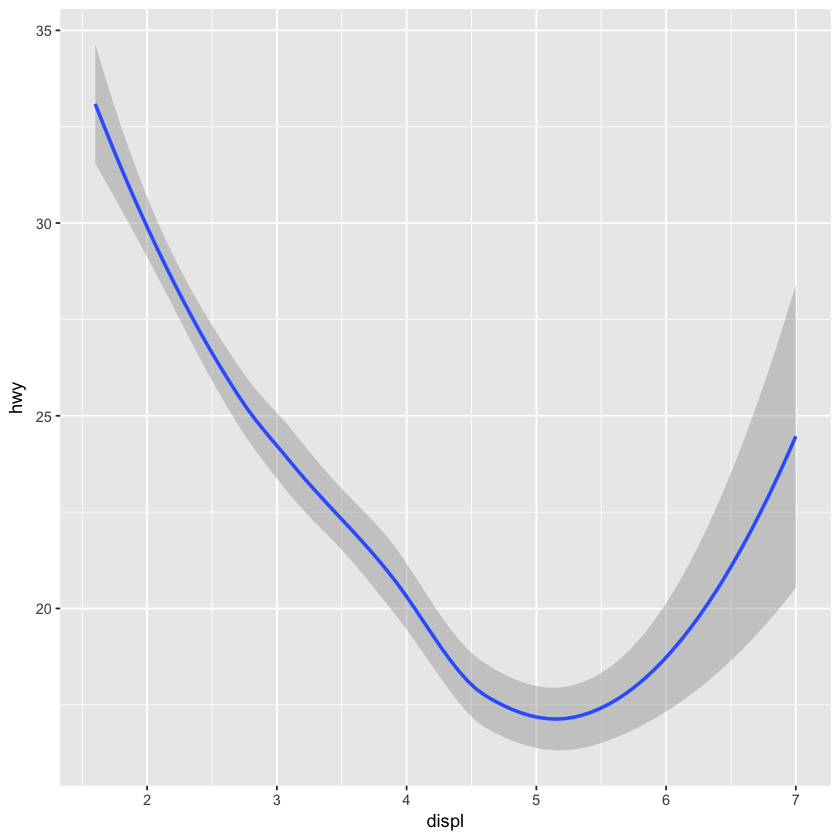

In [9]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

And, we can layer the smooth over the scatterplot pretty easily by adding "+ geom_point()". **Try it!**

`geom_smooth()` using method = 'loess'


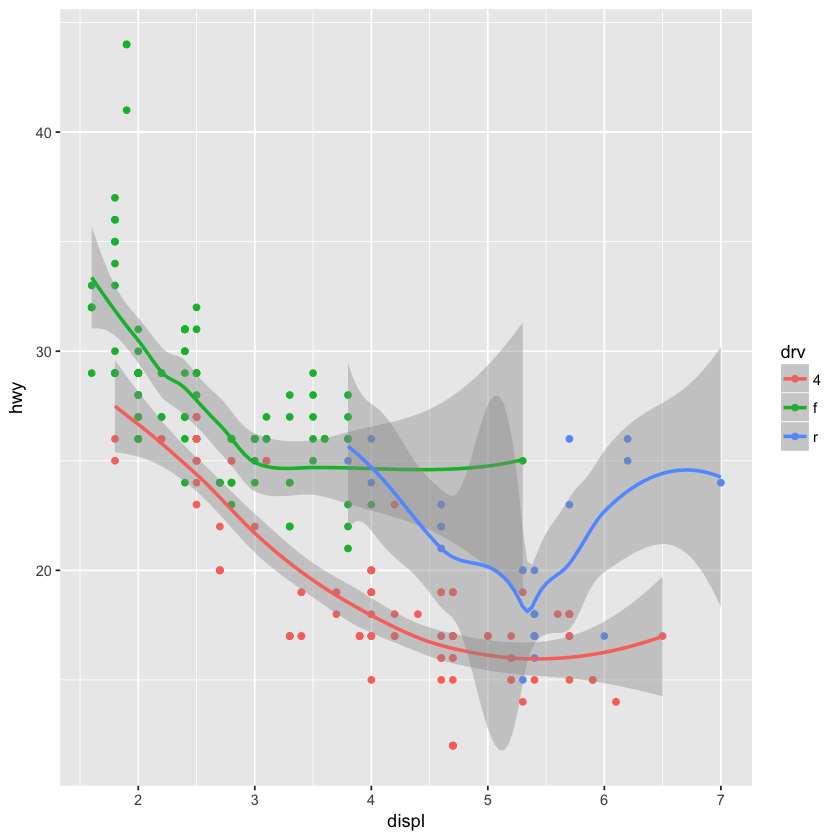

In [10]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy, color = drv))+
  geom_smooth(mapping = aes(x = displ, y = hwy, color = drv))

## B. Data Manipulation and Transformation

dplyr is a package in the Tidyverse that provides simple “verbs”, or functions that correspond to the most common data manipulation tasks, to help you translate your thoughts into code. Let's see how some of these verbs work on the gapminder dataset. **First, if you haven't already, let's install and load the gapminder package.**

In [2]:
#install.packages("gapminder")
library(gapminder)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



**Write a summary of the variables in this dataset. **

In [3]:
data(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


### Filter rows with filter()

The verb filter will easily allow you to filter rows (observations) in a data frame. Here's one possibility:

In [4]:
filter(gapminder, country == "United States")
#or
#gapminder %>%
#    filter(country == "United States")

country,continent,year,lifeExp,pop,gdpPercap
United States,Americas,1952,68.440,157553000,13990.48
United States,Americas,1957,69.490,171984000,14847.13
United States,Americas,1962,70.210,186538000,16173.15
United States,Americas,1967,70.760,198712000,19530.37
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1992,76.090,256894189,32003.93
United States,Americas,1997,76.810,272911760,35767.43


**Filter 

### Arranging with arrange()

**Use the arrange() verb, in conjunction with the code above to put the United States data in descending order with respect to year.**

In [5]:
gapminder %>%
    filter(country == "United States") %>%
    arrange(desc(year))

country,continent,year,lifeExp,pop,gdpPercap
United States,Americas,2007,78.242,301139947,42951.65
United States,Americas,2002,77.310,287675526,39097.10
United States,Americas,1997,76.810,272911760,35767.43
United States,Americas,1992,76.090,256894189,32003.93
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1967,70.760,198712000,19530.37
United States,Americas,1962,70.210,186538000,16173.15


### Selecting columns with select()

In addition to being able to filter out a subset of rows, you can also filter out a subset of columns with the select() verb. **Try to select just the country and year variables.**

In [6]:
head(select(gapminder, country, year))

country,year
Afghanistan,1952
Afghanistan,1957
Afghanistan,1962
Afghanistan,1967
Afghanistan,1972
Afghanistan,1977


### Changing columns with mutate()

We can also mutate certain columns. For example, suppose that we wanted life expectancy to be measured in years. We might write:

In [8]:
head(gapminder %>%
    mutate(lifeExp = lifeExp*12))

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,345.612,8425333,779.4453
Afghanistan,Asia,1957,363.984,9240934,820.8530
Afghanistan,Asia,1962,383.964,10267083,853.1007
Afghanistan,Asia,1967,408.240,11537966,836.1971
Afghanistan,Asia,1972,433.056,13079460,739.9811
Afghanistan,Asia,1977,461.256,14880372,786.1134


**Create a new column in the data frame that is just GDP (not GDP per capita).**

In [11]:
head(gapminder %>%
    mutate(gdp = gdpPercap * pop))

country,continent,year,lifeExp,pop,gdpPercap,gdp
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231


**Research another verb in dplyr and use it on this dataset.**